In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [2]:
df = pd.read_excel("Date_Fruit_Datasets.xlsx")

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
df.shape

(898, 35)

In [5]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [7]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [8]:
df["Class"].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [9]:
import seaborn as sns

In [10]:
# sns.pairplot(df)

In [11]:
from sklearn.preprocessing import LabelEncoder


x = df.drop("Class", axis=1)
x = pd.get_dummies(x, drop_first=True)  # Kategorik değişkenleri One-Hot Encode et

encoder = LabelEncoder()
y = encoder.fit_transform(df["Class"])  # Kategorik sınıfları 0,1,2,... şeklinde encode et


In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# MİN MAX SCALER

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.2, random_state=42)

In [15]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [16]:
model = Sequential()
model.add(Dense(1024, activation="relu"))  # INPUT

model.add(Dense(562, activation="relu"))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))  # Orta büyüklükte bir katman

model.add(Dense(256, activation="relu"))


model.add(Dense(128, activation="relu"))  # Küçük katmanda dropout gereksiz
model.add(Dense(128, activation="relu"))  # Küçük katmanda dropout gereksiz

model.add(Dense(7, activation="softmax"))  # OUTPUT

# 7 çıkış olması class kolonunda 7 farklı değer olmasıdır.


* Relu’dan (ReLU) başlayıp Softmax’a geçmemizin temel sebebi, ReLU’nun gizli katmanlarda iyi çalışması ve Softmax’ın sınıflandırma için uygun olmasıdır.

* Gizli katmanlarda ReLU (Rectified Linear Unit) kullanmamızın birkaç nedeni var:

✅ Öğrenmeyi hızlandırır: ReLU, negatif değerleri sıfıra çekerek modelin daha hızlı ve stabil öğrenmesini sağlar.

✅ Gradient Vanishing Problem’i önler: Sigmoid veya Tanh gibi aktivasyon fonksiyonlarında, çok derin ağlarda türevler sıfıra yaklaşır ve öğrenme yavaşlar. ReLU’da bu 
problem daha az görülür.

✅ Daha az hesaplama maliyeti vardır.

* Çıkış katmanında Softmax kullanmamızın sebebi, modelin çıktısını olasılıklara dönüştürmektir.

✅ Eğer modelin birden fazla sınıfa (multi-class classification) ait bir tahmin yapması gerekiyorsa, Softmax fonksiyonu en iyi seçenektir.

✅ Softmax, her sınıfa ait olasılıkları hesaplar ve toplamı 1 olacak şekilde normalize eder.

* Alternatif Durumlar

✅ Eğer ikili sınıflandırma (binary classification) yapıyorsak, Softmax yerine Sigmoid kullanabiliriz.

✅ Eğer regresyon problemi çözüyorsak, çıkış katmanında "linear" aktivasyon kullanabiliriz.

In [17]:
# Modeli Derleme

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# NEDEN EARLY STOPPİNG BU VERİDE İŞE YARAMADI ? 

In [18]:
'''
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
'''

'\nfrom tensorflow.keras.callbacks import EarlyStopping\nearly_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)\n'

* Bazen modelin yeterli süreyle eğitilmesi gerekir. Erken durdurma uygulandığında, model henüz doğru bir şekilde öğrenmeden durabilir. Eğer modelinizin eğitimi için daha fazla zamana ihtiyaç varsa, erken durdurma onu durdurmuş olabilir ve bu da modelin daha düşük performans göstermesine yol açar.

#### Ne Yapılabilir?

* Model Parametrelerini Yeniden Ayarlayın: Öğrenme oranı (learning rate), batch size ve epoch sayısı gibi hiperparametreleri gözden geçirebilirsiniz.

* Eğitim Süresini Arttırın: Eğitim süresi daha uzun olduğunda, modelin daha fazla öğrenme yapabilmesini sağlayabilirsiniz.
Validation Seti ve Eğitim Seti Ayarı: Modelin doğrulama verileri ile aşırı uyum yapmaması için daha iyi bir dengeleme yapılabilir.

In [19]:
X_train.dtypes

AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
dtype: object

In [20]:
# Modeli Eğitme
fit = model.fit(scaler_X_train, y_train, 
                epochs=100, 
                batch_size=256, 
                validation_data=(scaler_X_test, y_test))
                #callbacks=[early_stop]

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.2066 - loss: 1.9161 - val_accuracy: 0.5333 - val_loss: 1.7620
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4858 - loss: 1.7576 - val_accuracy: 0.6389 - val_loss: 1.4772
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6157 - loss: 1.4796 - val_accuracy: 0.6556 - val_loss: 1.1376
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6084 - loss: 1.1837 - val_accuracy: 0.6556 - val_loss: 0.8617
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6307 - loss: 0.9237 - val_accuracy: 0.7389 - val_loss: 0.6731
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7013 - loss: 0.7549 - val_accuracy: 0.8056 - val_loss: 0.5611
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7785 - loss: 0.6129 - val_accuracy: 0.8167 - val_loss: 0.4434
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7974 - loss: 0.5241 - val_accuracy: 0.8333 - val_loss

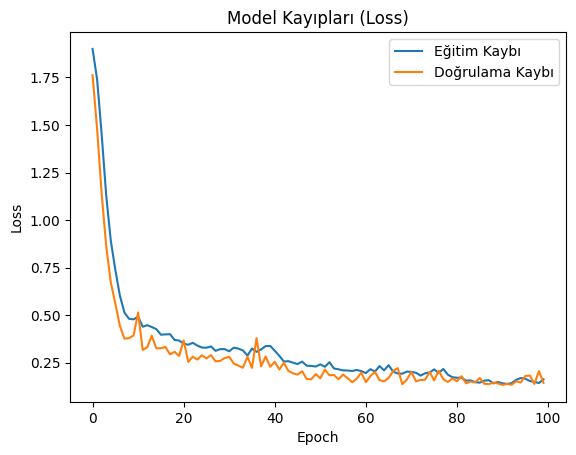

In [21]:
# Eğitim ve doğrulama kaybı grafiği
plt.plot(fit.history['loss'], label='Eğitim Kaybı')
plt.plot(fit.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıpları (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
pred = model.predict(scaler_X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [23]:
import numpy as np
pred_labels = np.argmax(pred, axis=1)  


In [24]:
import numpy as np
pred_labels = np.argmax(pred, axis=1)  



In [25]:
# Eğer y_test one-hot formatında değilse, onu one-hot encoding'e çevirin
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=7)

# Gerçek etiketlerin de sınıflara dönüştürülmesi
y_test_labels = np.argmax(y_test, axis=1)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Doğruluk (Accuracy) hesaplama
accuracy = accuracy_score(y_test_labels, pred_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, pred_labels)

# Classification Report
class_report = classification_report(y_test_labels, pred_labels)

In [27]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9444444444444444
Confusion Matrix:
[[11  0  0  1  0  0  0]
 [ 0 18  0  0  0  0  2]
 [ 0  1 49  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 1  0  0  0 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  4  0  0  0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.78      0.90      0.84        20
           2       1.00      0.98      0.99        50
           3       0.90      0.90      0.90        10
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.89      0.80      0.84        20

    accuracy                           0.94       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.95      0.94      0.95       180



# DAHA DOĞRU BİR MODEL OLUŞTURMAK İÇİN HER TUŞA BASALIM :)

* NOT = Herhangi bir şey değişmeyebilir...

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
# Verilerin türlerini ve şekillerini kontrol edelim
print("X_train shape:", scaler_X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", scaler_X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (718, 34)
y_train shape: (718,)
X_test shape: (180, 34)
y_test shape: (180, 7)


In [30]:
# Verilerin doğru türde olduğundan emin olalım
scaler_X_train = np.array(scaler_X_train).astype(np.float32)
scaler_X_test = np.array(scaler_X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)


In [31]:
# Etiketlerin boyutunu kontrol edelim
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Eğer y_train ve y_test one-hot encoding formatında ise, yeniden şekillendirmeye gerek yok
# Eğer sayısal etiketlerden oluşuyorsa, one-hot encoding yapmamız gerekebilir

from tensorflow.keras.utils import to_categorical

# Eğer y_train ve y_test sayısal etiketlere sahipse, one-hot encoding yapalım
if len(y_train.shape) == 1:  # Sayısal etiketler ise
    y_train = to_categorical(y_train, num_classes=7)

if len(y_test.shape) == 1:  # Sayısal etiketler ise
    y_test = to_categorical(y_test, num_classes=7)

# Etiketlerin boyutunu tekrar kontrol edelim
print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)


y_train shape: (718,)
y_test shape: (180, 7)
y_train shape after one-hot encoding: (718, 7)
y_test shape after one-hot encoding: (180, 7)


In [32]:
model = Sequential()

# Giriş katmanı
model.add(Dense(2048, activation="relu", input_shape=(scaler_X_train.shape[1],)))
model.add(Dropout(0.3))  # Fazla büyüklükte bir katman

# Ara katmanlar
model.add(Dense(1024, activation="relu"))


model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))  # Orta büyüklükte bir katman

model.add(Dense(256, activation="relu"))


model.add(Dense(128, activation="relu"))  # Küçük katmanda dropout gereksiz
model.add(Dense(128, activation="relu"))  # Küçük katmanda dropout gereksiz

# Çıkış katmanı (7 sınıf)
model.add(Dense(7, activation="softmax"))


C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
# scaler_X_train ve y_train'in aynı sayıda örneğe sahip olup olmadığını kontrol edin
print(scaler_X_train.shape[0], y_train.shape[0])

# Eğer veri setinin boyutları uyumsuzsa, eşit hale getirebilirsiniz
# Örneğin, scaler_X_train'in boyutuna göre y_train'i kesmek
y_train = y_train[:scaler_X_train.shape[0]]


718 718


In [35]:
print("y_train shape:", y_train.shape)  # (num_samples, 7) olmalı
print("y_test shape:", y_test.shape)    # (num_samples, 7) olmalı


y_train shape: (718, 7)
y_test shape: (180, 7)


In [36]:
scaler_X_train = np.array(scaler_X_train).astype(np.float32)
scaler_X_test = np.array(scaler_X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)


In [37]:
print("y_train shape:", y_train.shape)  # (num_samples, 7) olmalı
print("y_test shape:", y_test.shape)    # (num_samples, 7) olmalı


y_train shape: (718, 7)
y_test shape: (180, 7)


In [38]:
print("scaler_X_train shape:", scaler_X_train.shape)
print("y_train shape:", y_train.shape)


scaler_X_train shape: (718, 34)
y_train shape: (718, 7)


In [39]:
print("scaler_X_test shape:", scaler_X_test.shape)
print("y_test shape:", y_test.shape)


scaler_X_test shape: (180, 34)
y_test shape: (180, 7)


In [40]:
# Test verisi boyutlarını uyumlu hale getirelim
y_test = y_test[:scaler_X_test.shape[0]]


In [41]:
# Modeli eğitelim
fit = model.fit(scaler_X_train, y_train, epochs=100, batch_size=128, validation_data=(scaler_X_test, y_test))


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.2262 - loss: 1.8951 - val_accuracy: 0.6389 - val_loss: 1.4966
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5185 - loss: 1.4234 - val_accuracy: 0.6667 - val_loss: 0.9508
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6653 - loss: 0.9201 - val_accuracy: 0.8056 - val_loss: 0.5521
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7502 - loss: 0.6472 - val_accuracy: 0.7667 - val_loss: 0.5531
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7266 - loss: 0.6647 - val_accuracy: 0.8000 - val_loss: 0.5343
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7550 - loss: 0.5597 - val_accuracy: 0.6056 - val_loss: 0.7941
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7256 - loss: 0.6381 - val_accuracy: 0.7944 - val_loss: 0.4243
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8010 - loss: 0.5058 - val_accuracy: 0.8056 - val_loss:

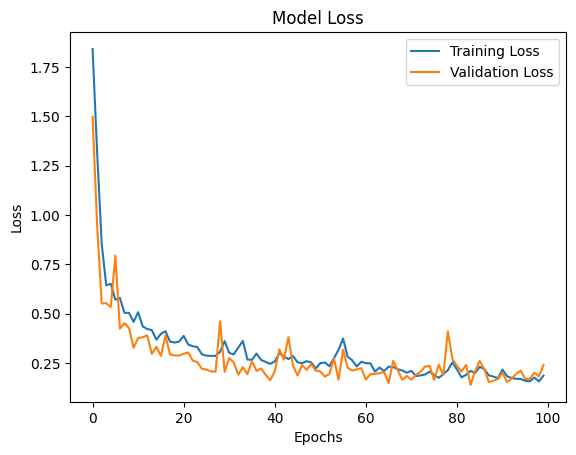

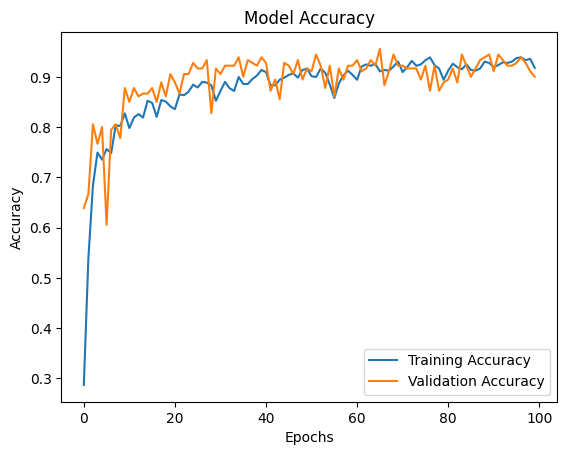

In [42]:
import matplotlib.pyplot as plt


# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [43]:
pred = model.predict(scaler_X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [44]:
import numpy as np
pred_labels = np.argmax(pred, axis=1)  


In [45]:
# Gerçek etiketlerin de sınıflara dönüştürülmesi
y_test_labels = np.argmax(y_test, axis=1)


In [46]:
# Doğruluk (Accuracy) hesaplama
accuracy = accuracy_score(y_test_labels, pred_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, pred_labels)

# Classification Report
class_report = classification_report(y_test_labels, pred_labels)

In [47]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9
Confusion Matrix:
[[10  0  0  2  0  0  0]
 [ 0 18  0  0  0  0  2]
 [ 0  6 44  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  5 30  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      0.90      0.77        20
           2       1.00      0.88      0.94        50
           3       0.59      1.00      0.74        10
           4       1.00      0.86      0.92        35
           5       1.00      1.00      1.00        33
           6       0.89      0.85      0.87        20

    accuracy                           0.90       180
   macro avg       0.88      0.90      0.88       180
weighted avg       0.93      0.90      0.91       180



* Daha da kötüye gitti...